In [6]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
"""
@author:TenYun
@time: 2020/4/16
@contact: tenyun.zhang.cs@gmail.com
"""
import gensim
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:


def load_embeddings(nodes_list, embedding_file, dim=200):
    """
    针对gensim Word2vec模型保存的embedding文件进行读取
    """
    embeddings_model = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False,
                                                                       unicode_errors='ignore')
    embedding_weights = []
    found = 0
    notfound = 0
    # print("start index word include embedding vector and store...")
    for node in nodes_list:
        node = int(node[2:])
        if str(node) in embeddings_model.vocab:
            embedding_weights.append(embeddings_model.word_vec(str(node)))
            found += 1
            # print(node)
        else:
            embedding_weights.append(np.random.uniform(-0.25, 0.25, dim).astype(np.float32))
            notfound += 1
    # print("found_cnt size is :" + str(found))
    print("not found_cnt size is :" + str(notfound))
    # print("embedding_weights size is %s " % (len(embedding_weights)))
    return embedding_weights

In [72]:
dataset_path = "G:\\CEGNN\\materials\\drugbank"
emb_path = "G:\\CEGNN\\materials\\emb\\drugbank"
inv_path = "G:\\CEGNN\\materials\\drugbank\\drugbank_index2id_edges.csv"
dataset = "drugbank_action_labels.csv"
ids_labels = pd.read_csv(os.path.join(dataset_path, dataset), delimiter=",", dtype=np.dtype(str),
                         names=["ids", "labels"])
ids_labels = ids_labels[ids_labels["labels"].isin(["inhibitor", "antagonist", "agonist"])]
nodes = ids_labels["ids"].tolist()
labels = ids_labels["labels"].tolist()
# embedding = "drugbank_LINE_200.emb"
embedding = "vec_drugbank_all.txt"
features = load_embeddings(nodes, os.path.join(emb_path, embedding), 400)
# digits = datasets.load_digits(n_class=6)
# X, y = digits.data, digits.target
X = np.array(features)

not found_cnt size is :95


Org data dimension is 400.       Embedded data dimension is 2


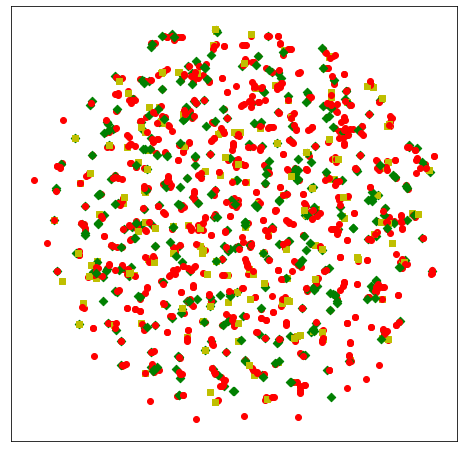

In [92]:
tsne = TSNE(n_components=2, perplexity=2.0, init='pca', learning_rate=5,  random_state=501)
X_tsne = tsne.fit_transform(X)
lb = LabelEncoder()
lb.fit(labels)
labels = lb.fit_transform(labels)
y = np.array(labels,)
y.dtype = np.int
m = {0:'o',1:'s',2:'D'}
cm = list(map(lambda x:m[x],y))
r = {0:'r',1:'y',2:'g'}
rm = list(map(lambda x:r[x],y))
print("Org data dimension is {}. \
      Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

"""嵌入空间可视化"""
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    #plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),
     #        fontdict={'weight': 'bold', 'size': 9})
    plt.scatter(X_norm[i, 0],X_norm[i, 1], marker=cm[i], c=rm[i])
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
digits = datasets.load_digits(n_class=6)
X2, y2 = digits.data, digits.target

In [12]:
y2

array([0, 1, 2, ..., 4, 4, 0])